In [1]:
import imagine as im
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
from imagine.funpair_corr_analysis import *

2025-10-02 15:02:47.648 | INFO     | imagine.config:<module>:11 - PROJ_ROOT path is: /Users/saurabh.ranjan/Library/CloudStorage/OneDrive-UniversityofFlorida/2020_2025_reality_monitoring_dissertation/osf-imagine/imagine_world_model


In [2]:
data_dir = im.config.PROCESSED_DATA_DIR


vv_stability_eg = pd.read_csv(data_dir/"sp_eg_cor_stab_vviq.csv")

ps_stability_eg = pd.read_csv(data_dir/"sp_eg_cor_stab_psiq.csv")

# Stability tables

In [3]:
vv_stability_eg = vv_stability_eg.pivot_table(index=["model", "group"], columns="Name", values="Value")
ps_stability_eg = ps_stability_eg.pivot_table(index=["model", "group"], columns="Name", values="Value")


In [4]:
vv_stability_eg.reset_index().to_csv(data_dir/"sp_eg_cor_stab_vviq_wide.csv", index=False)
ps_stability_eg.reset_index().to_csv(data_dir/"sp_eg_cor_stab_psiq_wide.csv", index=False)


In [5]:
vv_stability_eg.reset_index().loc[vv_stability_eg.reset_index()["group"]=="independent"]

Name,model,group,betweenness,closeness,expectedInfluence,strength
1,g12,independent,0.421667,0.421667,0.750000,0.676667
3,g12qt,independent,0.176667,0.265000,0.750000,0.750000
5,g27,independent,0.215000,0.443333,0.748333,0.746667
7,g27qt,independent,0.191667,0.318333,0.748333,0.731667
14,ll70,independent,0.181667,0.313333,0.750000,0.750000
16,llsc,independent,0.390000,0.598333,0.746667,0.653333


In [6]:
vv_stability_eg.describe()    

Name,betweenness,closeness,expectedInfluence,strength
count,17.000000,17.000000,17.000000,17.000000
mean,0.345986,0.478561,0.743587,0.711634
std,0.141766,0.140899,0.016690,0.052090
min,0.176667,0.265000,0.689464,0.569316
25%,0.206667,0.376667,0.748333,0.676667
50%,0.388333,0.469501,0.750000,0.731667
75%,0.431354,0.598333,0.750000,0.748609
max,0.625000,0.735000,0.750000,0.750000


# Clusters

In [7]:
clusters_vv = pd.read_csv(data_dir/"clusters_vv_eg.csv")
clusters_ps = pd.read_csv(data_dir/"clusters_ps_eg.csv")

In [8]:
clusters_vv

,Unnamed: 0,fl,pl1,pl2,pl,flpl,g12_i,g12qt_i,g27_i,g27qt_i,ll70_i,llsc_i,g12_c,g12qt_c,g27_c,g27qt_c,ll70_c,llsc_c
0,A_1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,A_2,1,1,1,1,1,1,1,1,1,1,1,2,1,2,2,1,1
2,A_3,1,1,1,1,1,1,1,1,1,1,1,2,1,2,2,1,2
3,A_4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1
4,B_1,2,2,2,2,2,1,1,1,1,1,2,3,1,1,3,1,2
5,B_2,2,1,2,3,2,1,1,1,1,1,2,3,1,1,3,1,2
6,B_3,2,3,3,2,3,1,1,1,1,1,3,4,1,3,4,1,2
7,B_4,2,3,3,2,3,1,1,1,1,1,2,4,1,1,4,1,2
8,C_1,3,1,4,1,1,1,1,1,1,1,3,1,1,1,1,1,3
9,C_2,3,1,4,1,1,1,1,1,1,1,1,3,1,1,3,1,1


In [9]:
clusters_vv.rename(columns={"Unnamed: 0": "nodes"}, inplace=True)
clusters_ps.rename(columns={"Unnamed: 0": "nodes"}, inplace=True)

clusters_vv2 = clusters_vv.set_index("nodes").stack().reset_index()
clusters_ps2 = clusters_ps.set_index("nodes").stack().reset_index()

In [10]:
clusters_vv2.columns = ["nodes", "groups", "cluster"]
clusters_ps2.columns = ["nodes", "groups", "cluster"]


In [11]:
clusters_ps2

,nodes,groups,cluster
0,App_1,fl,1
1,App_1,uk,1
2,App_1,ukfl,1
3,App_1,g12_i,1
4,App_1,g12qt_i,1
...,...,...,...
310,Fe_3,g12qt_c,1
311,Fe_3,g27_c,1
312,Fe_3,g27qt_c,5
313,Fe_3,ll70_c,1


In [12]:
from sklearn.metrics import adjusted_rand_score
cluster_scores_vv = []
for x in clusters_vv2["groups"].unique():
    for y in clusters_vv2["groups"].unique():
        dx = clusters_vv2.loc[clusters_vv2["groups"]==x].sort_values(by="nodes")
        dy = clusters_vv2.loc[clusters_vv2["groups"]==y].sort_values(by="nodes")

        cluster_scores_vv.append(
            {
                "x":x,
                "y":y,
                "adj_rand": adjusted_rand_score(dx["cluster"],dy["cluster"])


            }

        )

In [13]:
cluster_scores_ps = []
for x in clusters_ps2["groups"].unique():
    for y in clusters_ps2["groups"].unique():
        dx = clusters_ps2.loc[clusters_ps2["groups"]==x].sort_values(by="nodes")
        dy = clusters_ps2.loc[clusters_ps2["groups"]==y].sort_values(by="nodes")

        cluster_scores_ps.append(
            {
                "x":x,
                "y":y,
                "adj_rand": adjusted_rand_score(dx["cluster"],dy["cluster"])


            }

        )

In [14]:
cluster_scores_vv = pd.DataFrame(cluster_scores_vv)
cluster_exp_groups_vv = cluster_scores_vv.x.unique()
cluster_scores_vv_mat2 = cluster_scores_vv.pivot(index="x",columns = "y",values="adj_rand")
cluster_scores_vv_mat2 = cluster_scores_vv_mat2.reindex(index=cluster_exp_groups_vv, columns=cluster_exp_groups_vv)

In [15]:
cluster_scores_vv_mat2.to_csv(data_dir/"vv_cluster_adj_rand.csv")

In [19]:
fig_out_dir = im.config.FIGURES_DIR/"svg"
if not fig_out_dir.is_dir():
    fig_out_dir.mkdir()

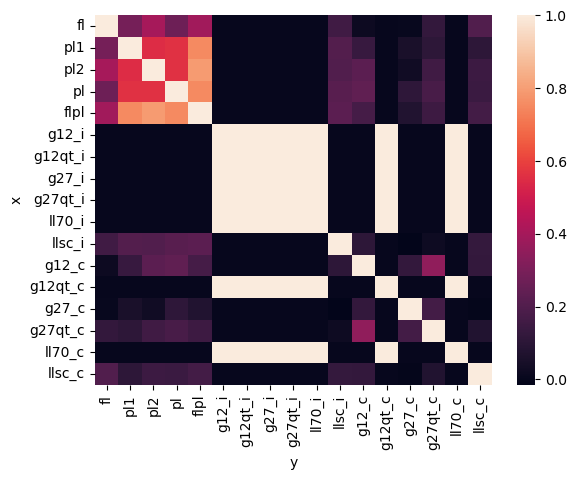

In [20]:
sns.heatmap(cluster_scores_vv_mat2)
plt.savefig(fig_out_dir / "cluster_scores_vv.svg", bbox_inches='tight', dpi=700)

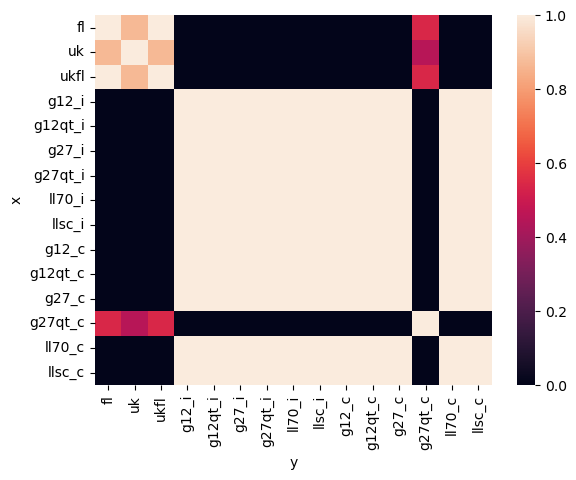

In [21]:
cluster_scores_ps = pd.DataFrame(cluster_scores_ps)
cluster_exp_groups_ps = cluster_scores_ps.x.unique()
cluster_scores_ps_mat2 = cluster_scores_ps.pivot(index="x",columns = "y",values="adj_rand")
cluster_scores_ps_mat2 = cluster_scores_ps_mat2.reindex(index=cluster_exp_groups_ps, columns=cluster_exp_groups_ps)
sns.heatmap(cluster_scores_ps_mat2)
plt.savefig(fig_out_dir / "cluster_scores_ps.svg", bbox_inches='tight', dpi=700)

In [22]:
cluster_scores_vv_mat2

y,fl,pl1,pl2,pl,flpl,g12_i,g12qt_i,g27_i,g27qt_i,ll70_i,llsc_i,g12_c,g12qt_c,g27_c,g27qt_c,ll70_c,llsc_c
x,,,,,,,,,,,,,,,,,
fl,1.000000,0.285951,0.402658,0.266272,0.389664,0.0,0.0,0.0,0.0,0.0,0.157068,0.016157,0.0,0.007047,0.121667,0.0,0.200640
pl1,0.285951,1.000000,0.548929,0.559838,0.752988,0.0,0.0,0.0,0.0,0.0,0.205748,0.132181,0.0,0.053170,0.105831,0.0,0.104084
pl2,0.402658,0.548929,1.000000,0.563380,0.791019,0.0,0.0,0.0,0.0,0.0,0.201618,0.223963,0.0,0.029583,0.155482,0.0,0.145438
pl,0.266272,0.559838,0.563380,1.000000,0.750549,0.0,0.0,0.0,0.0,0.0,0.216749,0.236240,0.0,0.109957,0.174556,0.0,0.141407
flpl,0.389664,0.752988,0.791019,0.750549,1.000000,0.0,0.0,0.0,0.0,0.0,0.225974,0.169722,0.0,0.072270,0.148072,0.0,0.163799
g12_i,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,1.0,0.000000,0.000000,1.0,0.000000
g12qt_i,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,1.0,0.000000,0.000000,1.0,0.000000
g27_i,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,1.0,0.000000,0.000000,1.0,0.000000
g27qt_i,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,1.0,0.000000,0.000000,1.0,0.000000


In [23]:
cluster_scores_ps_mat2

y,fl,uk,ukfl,g12_i,g12qt_i,g27_i,g27qt_i,ll70_i,llsc_i,g12_c,g12qt_c,g27_c,g27qt_c,ll70_c,llsc_c
x,,,,,,,,,,,,,,,
fl,1.000000,0.869888,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.541547,0.0,0.0
uk,0.869888,1.000000,0.869888,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.450402,0.0,0.0
ukfl,1.000000,0.869888,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.541547,0.0,0.0
g12_i,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,1.0,1.0
g12qt_i,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,1.0,1.0
g27_i,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,1.0,1.0
g27qt_i,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,1.0,1.0
ll70_i,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,1.0,1.0
llsc_i,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,1.0,1.0
